In [91]:
#!pip install folium

In [92]:
import pandas as pd
import numpy as np
import math
import random
import datetime
import time
import seaborn as sns

import requests
import json

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colorbar

import folium
from folium import plugins

In [93]:
# ingest data
df_mx = pd.read_csv(r'C:\Users\Ana Veronica\Documents\Universidad\analisis_datos\Repositorio_clase\Ejercicios_seaborn\mexico_data.csv')

In [94]:
# read
with open(r'C:\Users\Ana Veronica\Documents\Universidad\analisis_datos\Repositorio_clase\Ejercicios_seaborn\municipality_geo-json_shapes.json\municipality_geo-json_shapes.json') as f:
    geo_json_mx = json.load(f)

In [95]:
df_mx.columns

Index(['Code', 'Municipality', 'State Code', 'State',
       'Total Male Population: 2010', 'Total Female Population: 2010',
       'Percentage of Males of 15 to 29: 2010',
       'Percentage of Males of 15 to 29: 2015',
       'Percentage of Females of 15 to 29: 2010',
       'Percentage of Females of 15 to 29: 2015',
       'Percentage of Males of 60 or more: 2010',
       'Percentage of Males of 60 or more: 2015',
       'Percentage of Females of 60 or more: 2010',
       'Percentage of Females of 60 or more: 2015', 'Median Male Age: 2010',
       'Median Female Age: 2010', 'Male Births: 1994', 'Male Births: 1995',
       'Male Births: 1996', 'Male Births: 1997', 'Male Births: 1998',
       'Male Births: 1999', 'Male Births: 2000', 'Male Births: 2001',
       'Male Births: 2002', 'Male Births: 2003', 'Male Births: 2004',
       'Male Births: 2005', 'Male Births: 2006', 'Male Births: 2007',
       'Male Births: 2008', 'Male Births: 2009', 'Male Births: 2010',
       'Male Births: 201

# Limpieza del dataset
Cambio del nombre de las columnas

In [96]:
diccionario_nombres = {
    'Total Male Population: 2010' : 'Total_Male_2010',
    'Total Female Population: 2010' : 'Total_Fem_2010',
    'Percentage of Males of 15 to 29: 2010' : '2010_Male_1529',
    'Percentage of Males of 15 to 29: 2015' : '2015_Male_1529',
    'Percentage of Females of 15 to 29: 2010' : '2010_Fem_1529',
    'Percentage of Females of 15 to 29: 2015' : '2015_Fem_1529',
    'Percentage of Males of 60 or more: 2010' : '2010_Male_60',
    'Percentage of Males of 60 or more: 2015' : '2015_Male_60',
    'Percentage of Females of 60 or more: 2010' : '2010_Fem_60',
    'Percentage of Females of 60 or more: 2015' : '2015_Fem_60',
    'Median Male Age: 2010' : '2010_Male_md',
    'Median Female Age: 2010' : '2010_Fem_md',
    'Male Births: 1994' : '1994_Male',
    'Male Births: 1995' : '1995_Male',
    'Male Births: 1996' : '1996_Male',
    'Male Births: 1997' : '1997_Male',
    'Male Births: 1998' : '1998_Male',
    'Male Births: 1999' : '1999_Male',
    'Male Births: 2000' : '2000_Male', 
    'Male Births: 2001' : '2001_Male',
    'Male Births: 2002' : '2022_Male', 
    'Male Births: 2003' : '2003_Male',
    'Male Births: 2004' : '2004_Male',
    'Male Births: 2005' : '2005_Male',
    'Male Births: 2006' : '2006_Male',
    'Male Births: 2007' : '2007_Male',
    'Male Births: 2008' : '2008_Male',
    'Male Births: 2009' : '2009_Male',
    'Male Births: 2010' : '2010_Male',
    'Male Births: 2011' : '2011_Male', 
    'Male Births: 2012' : '2012_Male', 
    'Male Births: 2013' : '2013_Male',
    'Male Births: 2014' : '2014_Male', 
    'Male Births: 2015' : '2015_Male', 
    'Male Births: 2016' : '2016_Male',
    'Male Births: 2017' : '2017_Male', 
    'Male Births: 2018' : '2018_Male',
    'Female Births: 1994' : '1994_Fem',
    'Female Births: 1995' : '1995_Fem',
    'Female Births: 1996' : '1996_Fem',
    'Female Births: 1997' : '1997_Fem',
    'Female Births: 1998' : '1998_Fem',
    'Female Births: 1999' : '1999_Fem',
    'Female Births: 2000' : '2000_Fem', 
    'Female Births: 2001' : '2001_Fem',
    'Female Births: 2002' : '2022_Fem', 
    'Female Births: 2003' : '2003_Fem',
    'Female Births: 2004' : '2004_Fem',
    'Female Births: 2005' : '2005_Fem',
    'Female Births: 2006' : '2006_Fem',
    'Female Births: 2007' : '2007_Fem',
    'Female Births: 2008' : '2008_Fem',
    'Female Births: 2009' : '2009_Fem',
    'Female Births: 2010' : '2010_Fem',
    'Female Births: 2011' : '2011_Fem', 
    'Female Births: 2012' : '2012_Fem', 
    'Female Births: 2013' : '2013_Fem',
    'Female Births: 2014' : '2014_Fem', 
    'Female Births: 2015' : '2015_Fem', 
    'Female Births: 2016' : '2016_Fem',
    'Female Births: 2017' : '2017_Fem', 
    'Female Births: 2018' : '2018_Fem'
}

df_mx.rename(columns=diccionario_nombres, inplace=True)

Analizar si existen valores vacios

In [97]:
df_mx.isna().sum().sum()

0

Analizar el tipo de estructura de los datos

In [98]:
df_mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             2436 non-null   int64  
 1   Municipality     2436 non-null   object 
 2   State Code       2436 non-null   int64  
 3   State            2436 non-null   object 
 4   Total_Male_2010  2436 non-null   int64  
 5   Total_Fem_2010   2436 non-null   int64  
 6   2010_Male_1529   2436 non-null   float64
 7   2015_Male_1529   2436 non-null   float64
 8   2010_Fem_1529    2436 non-null   float64
 9   2015_Fem_1529    2436 non-null   float64
 10  2010_Male_60     2436 non-null   float64
 11  2015_Male_60     2436 non-null   float64
 12  2010_Fem_60      2436 non-null   float64
 13  2015_Fem_60      2436 non-null   float64
 14  2010_Male_md     2436 non-null   float64
 15  2010_Fem_md      2436 non-null   float64
 16  1994_Male        2436 non-null   int64  
 17  1995_Male     

In [99]:
#Cambiar las columnas a enteros
col2change = {
    'Municipality' : 'string',
    '2010_Male_1529' : 'int64',
    '2015_Male_1529' : 'int64', 
    '2010_Fem_1529' : 'int64',
    '2015_Fem_1529' : 'int64' ,
    '2010_Male_60' : 'int64', 
    '2015_Male_60' : 'int64',
    '2010_Fem_60' : 'int64',
    '2015_Fem_60' : 'int64',
    '2010_Male_md' : 'int64',
    '2010_Fem_md' : 'int64'}

df_mx = df_mx.astype(col2change)

# Analisis de datos
Agrupando por casos: 
* Comparativa de los 10 estados con mayores nacimientos en el 2018.
* Descripción de la población en el 2010 del estado con mayor número de habitantes.

### Comparativa de los 10 estados con mayores nacimientos en el 2018.

<Axes: xlabel='2018_Male', ylabel='State'>

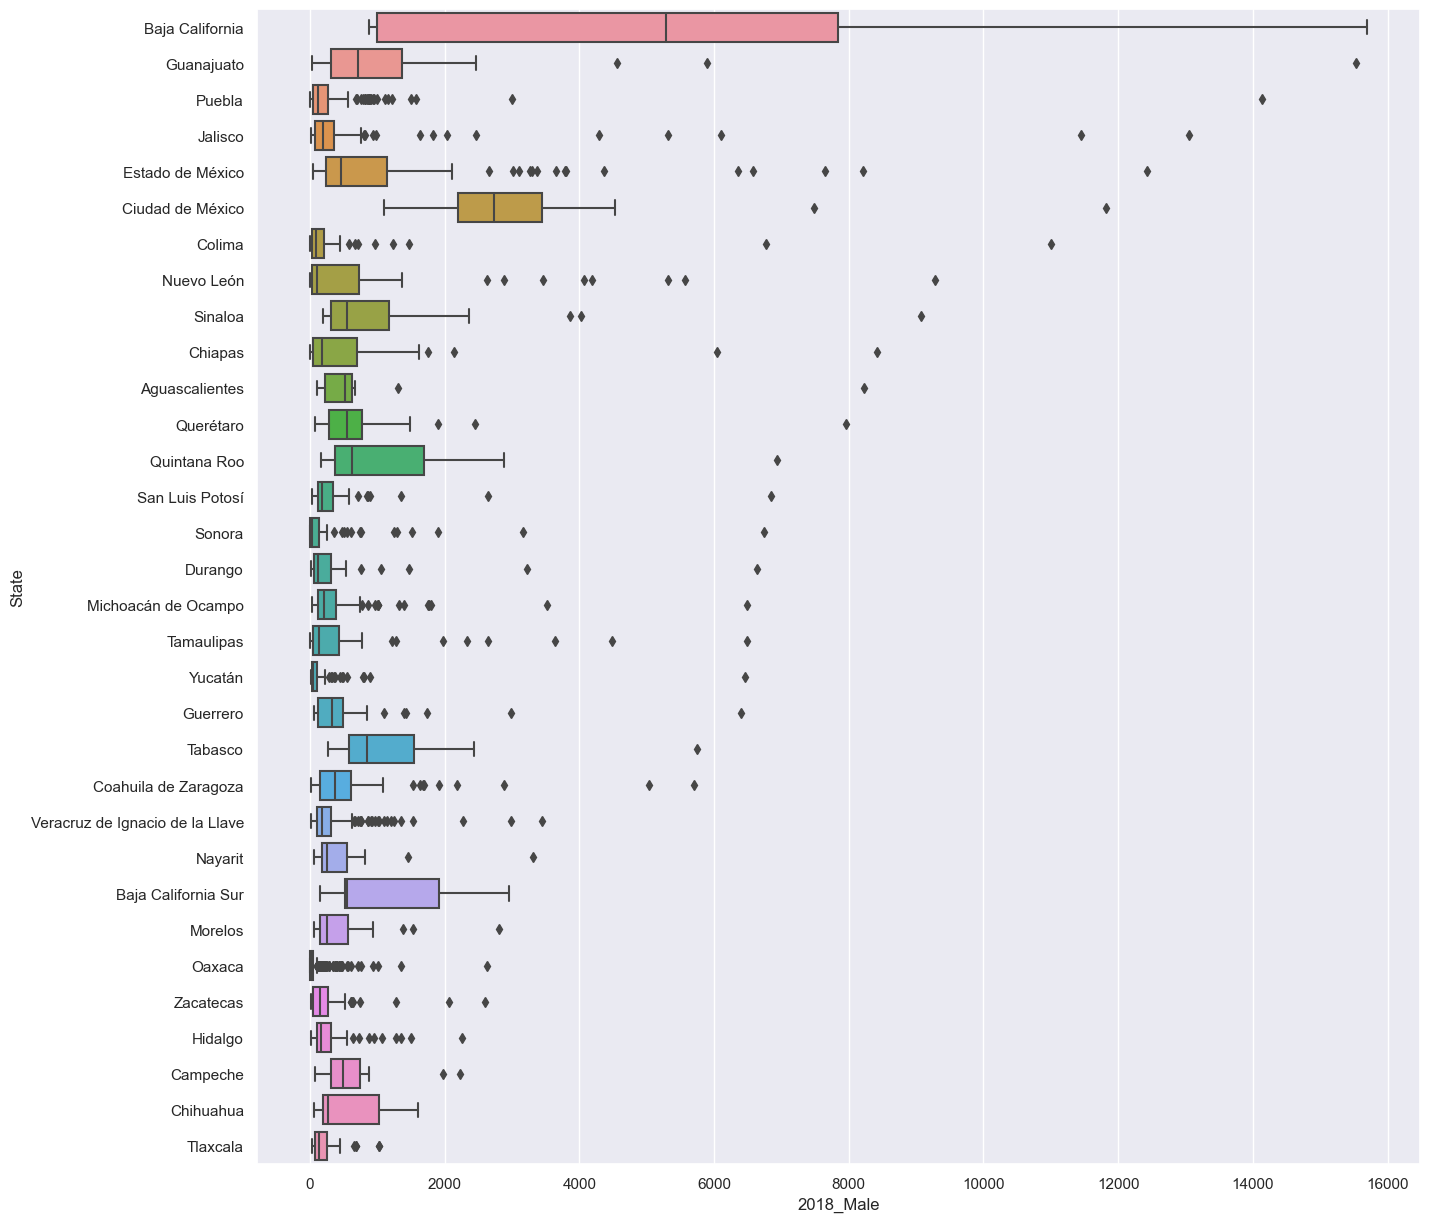

In [100]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.boxplot(data = df_mx.sort_values(by=['2018_Male'], ascending = False), x = '2018_Male', y = 'State')

<Axes: xlabel='2018_Fem', ylabel='State'>

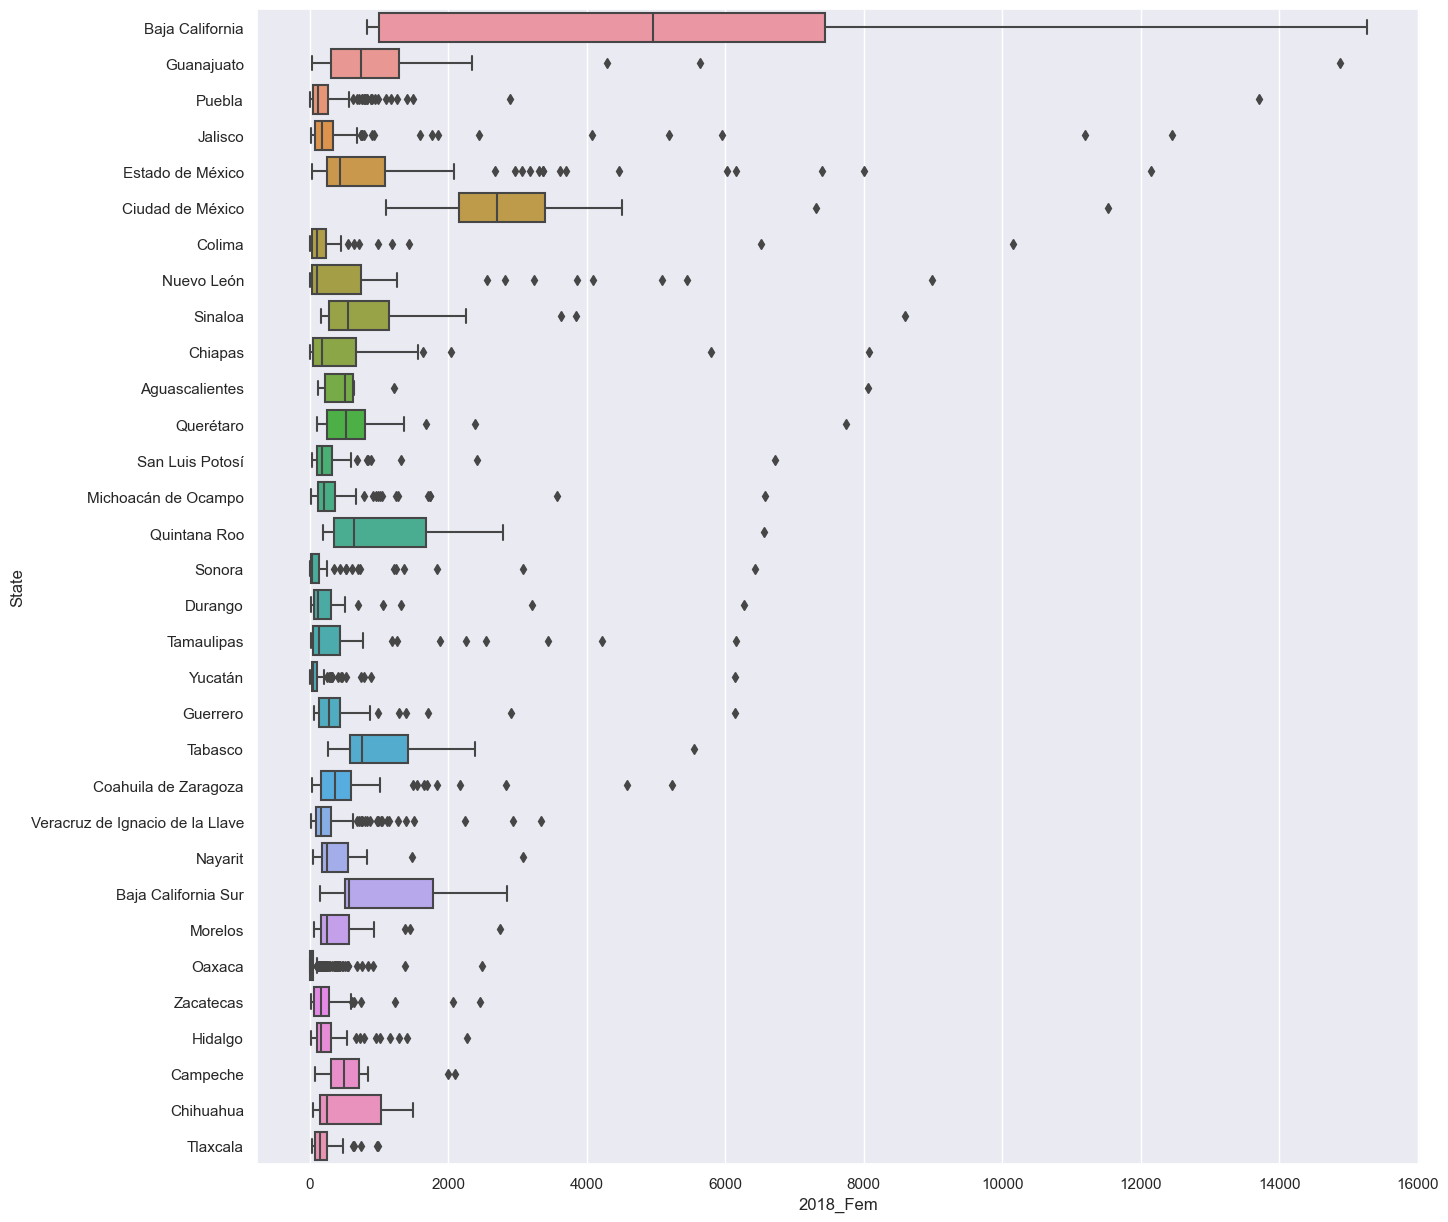

In [101]:
sns.boxplot(data = df_mx.sort_values(by=['2018_Fem'], ascending = False), x = '2018_Fem', y = 'State')

In [102]:
#Obtener los 10 estados con mayor nacimientos para mujer y hombre
temp_fem = df_mx.sort_values(by= '2018_Fem', ascending = False)['State'].unique()[0:10]
temp_male = df_mx.sort_values(by= '2018_Male', ascending = False)['State'].unique()[0:10]
temp_fem, temp_male
#Como son los mismos, me quedare con una sola lista. 
lista_estados = temp_fem

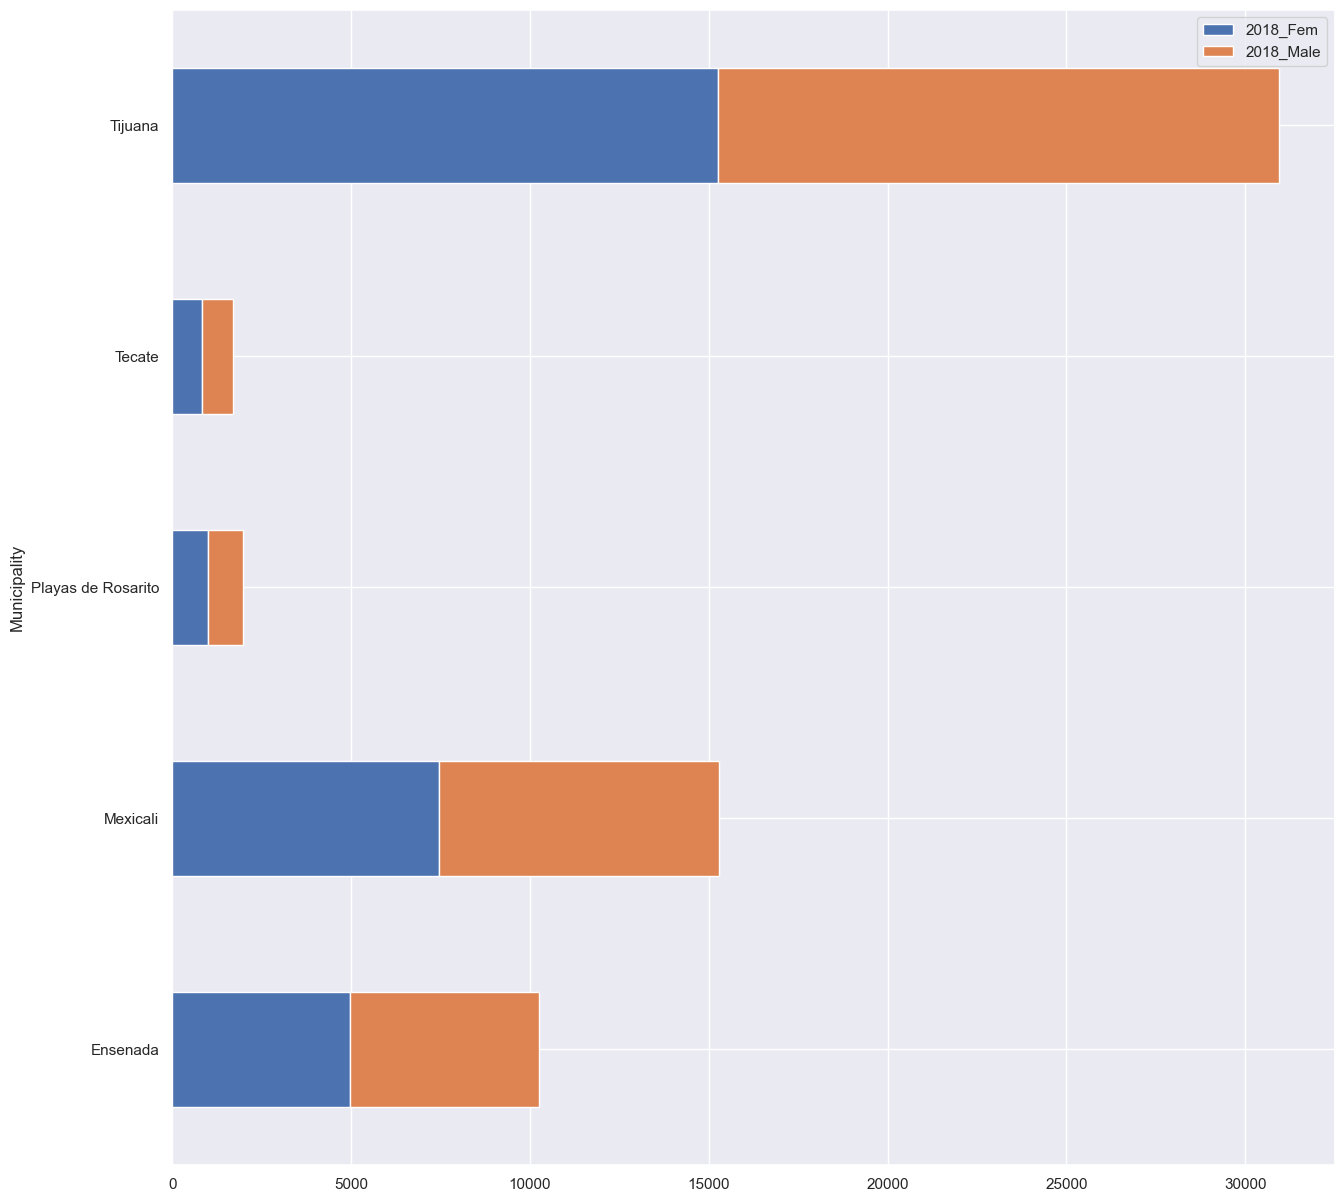

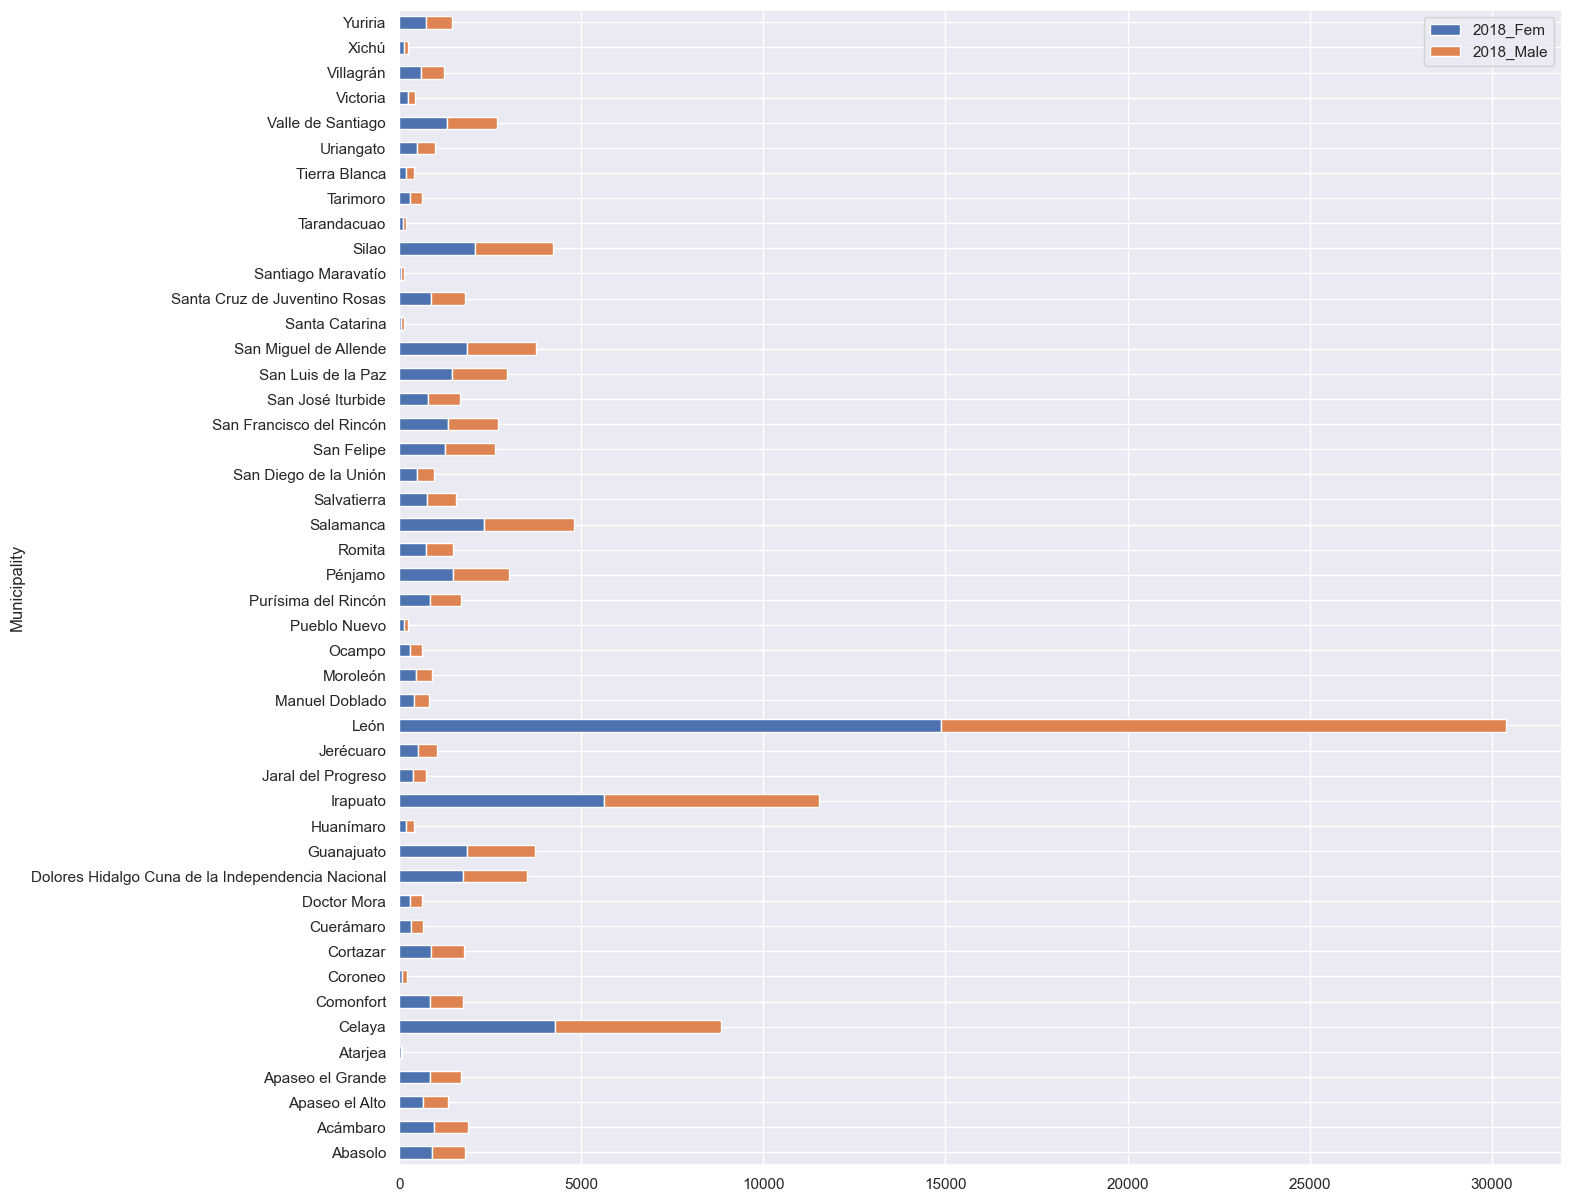

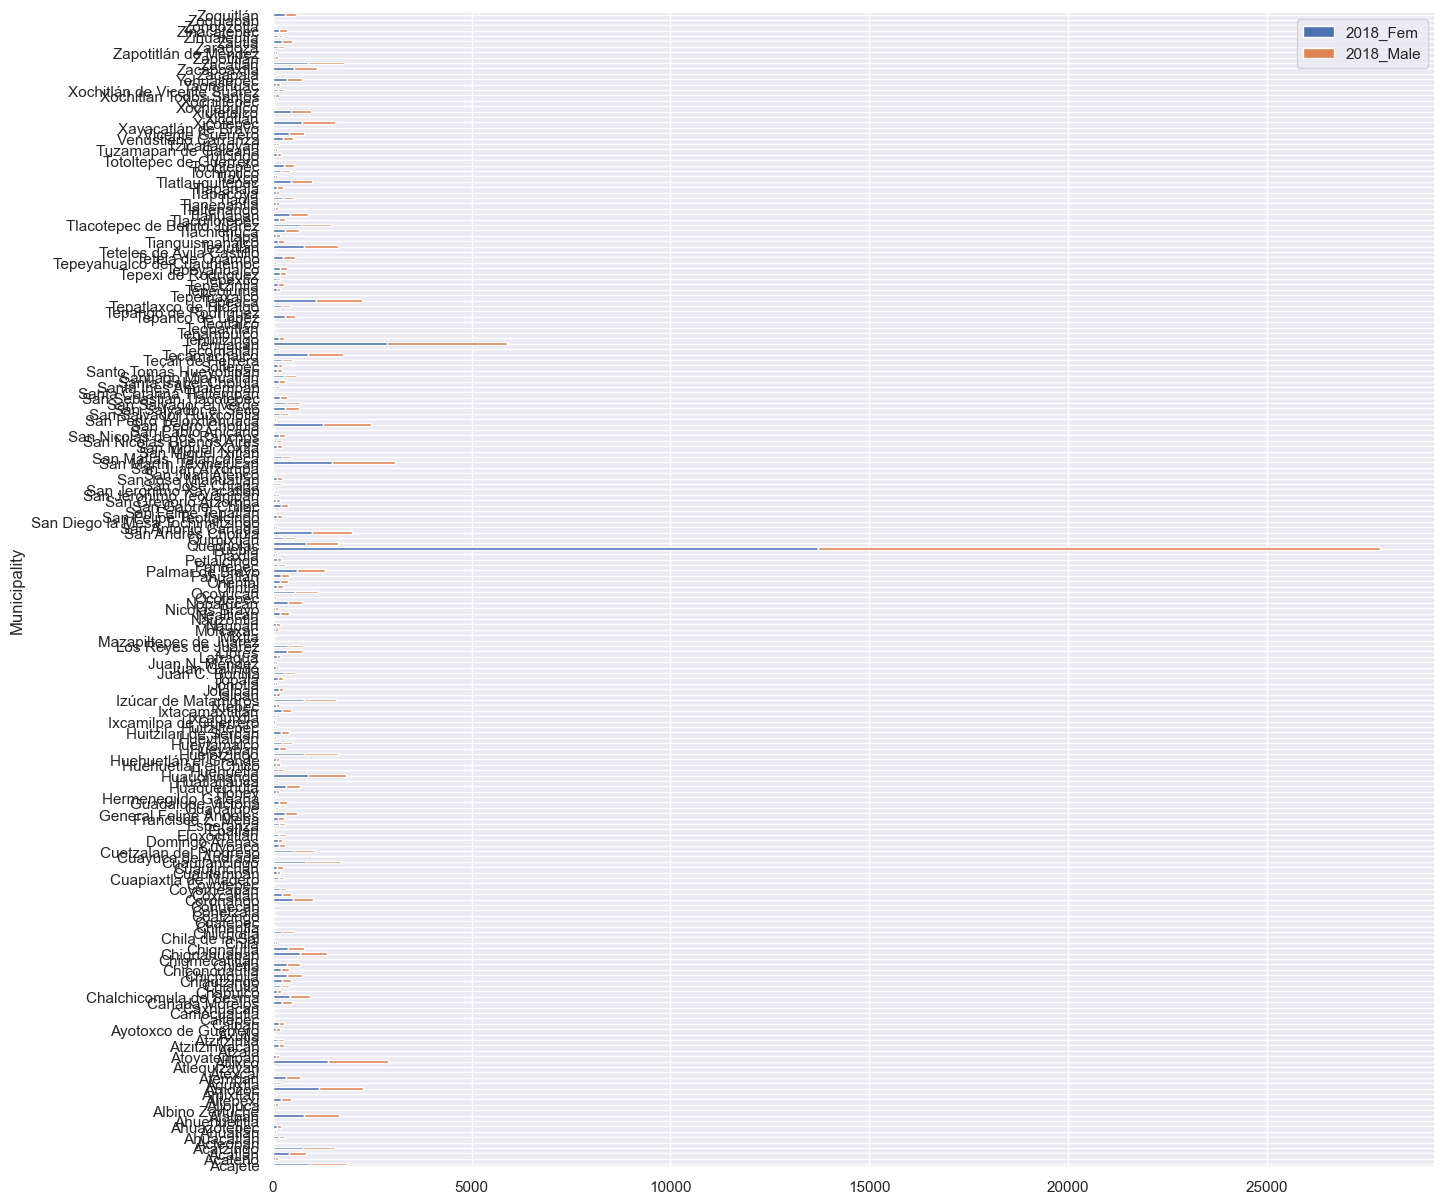

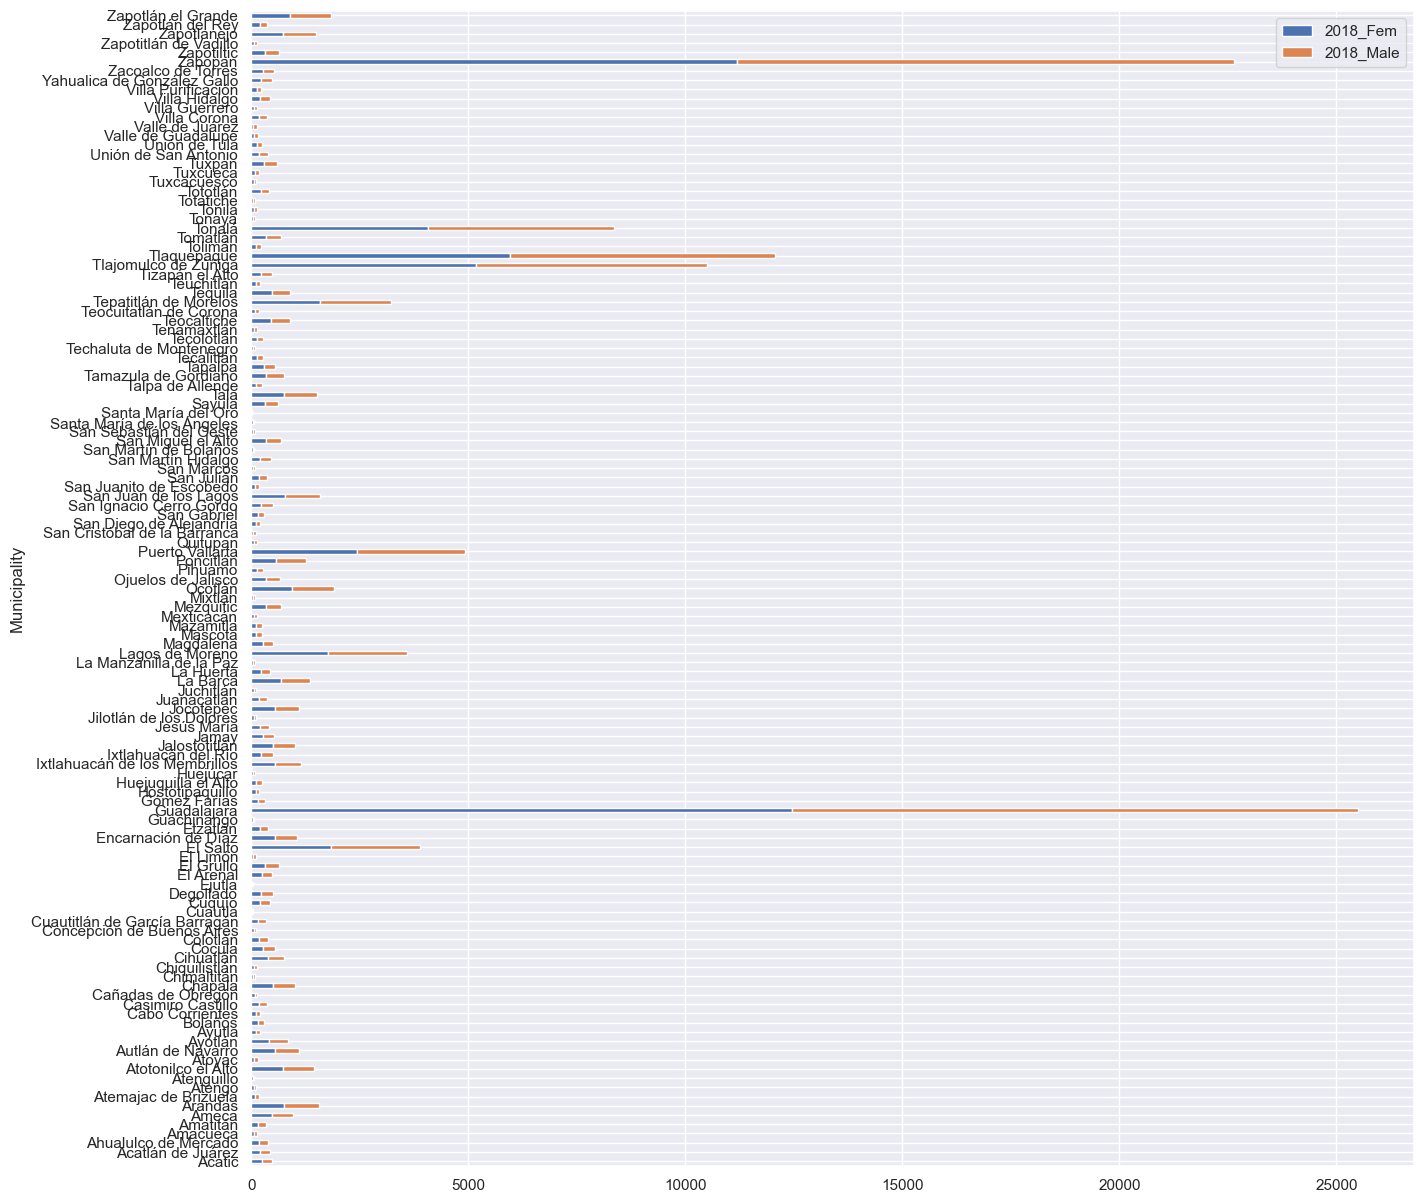

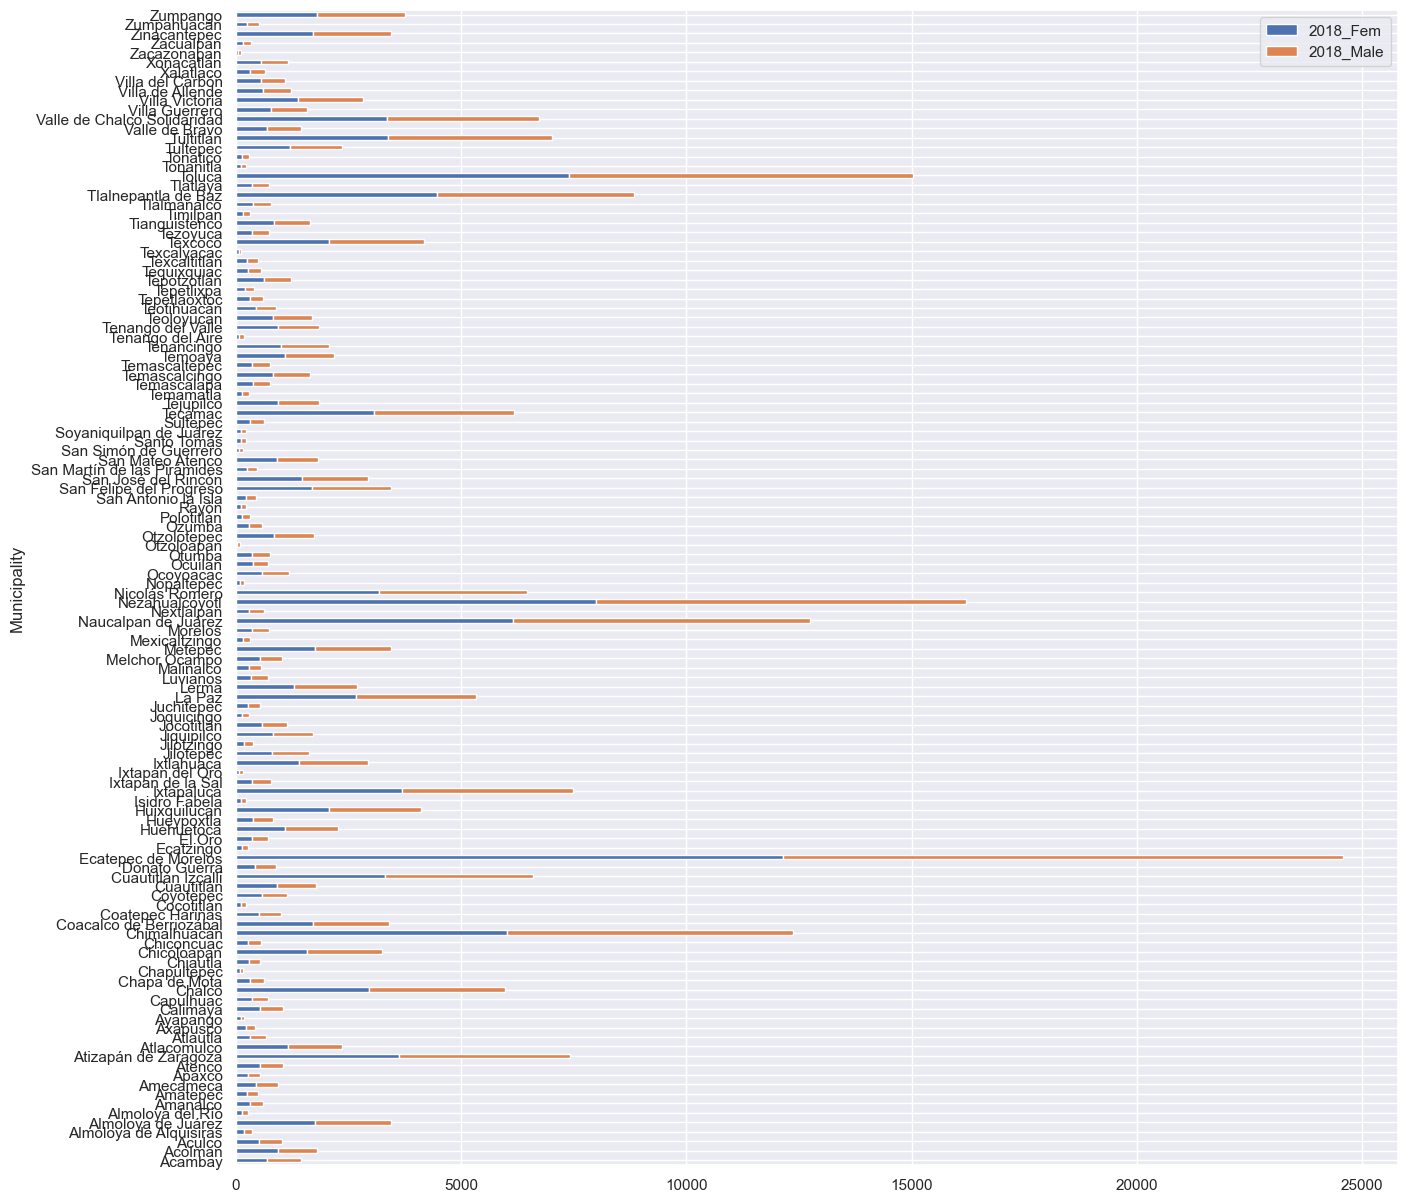

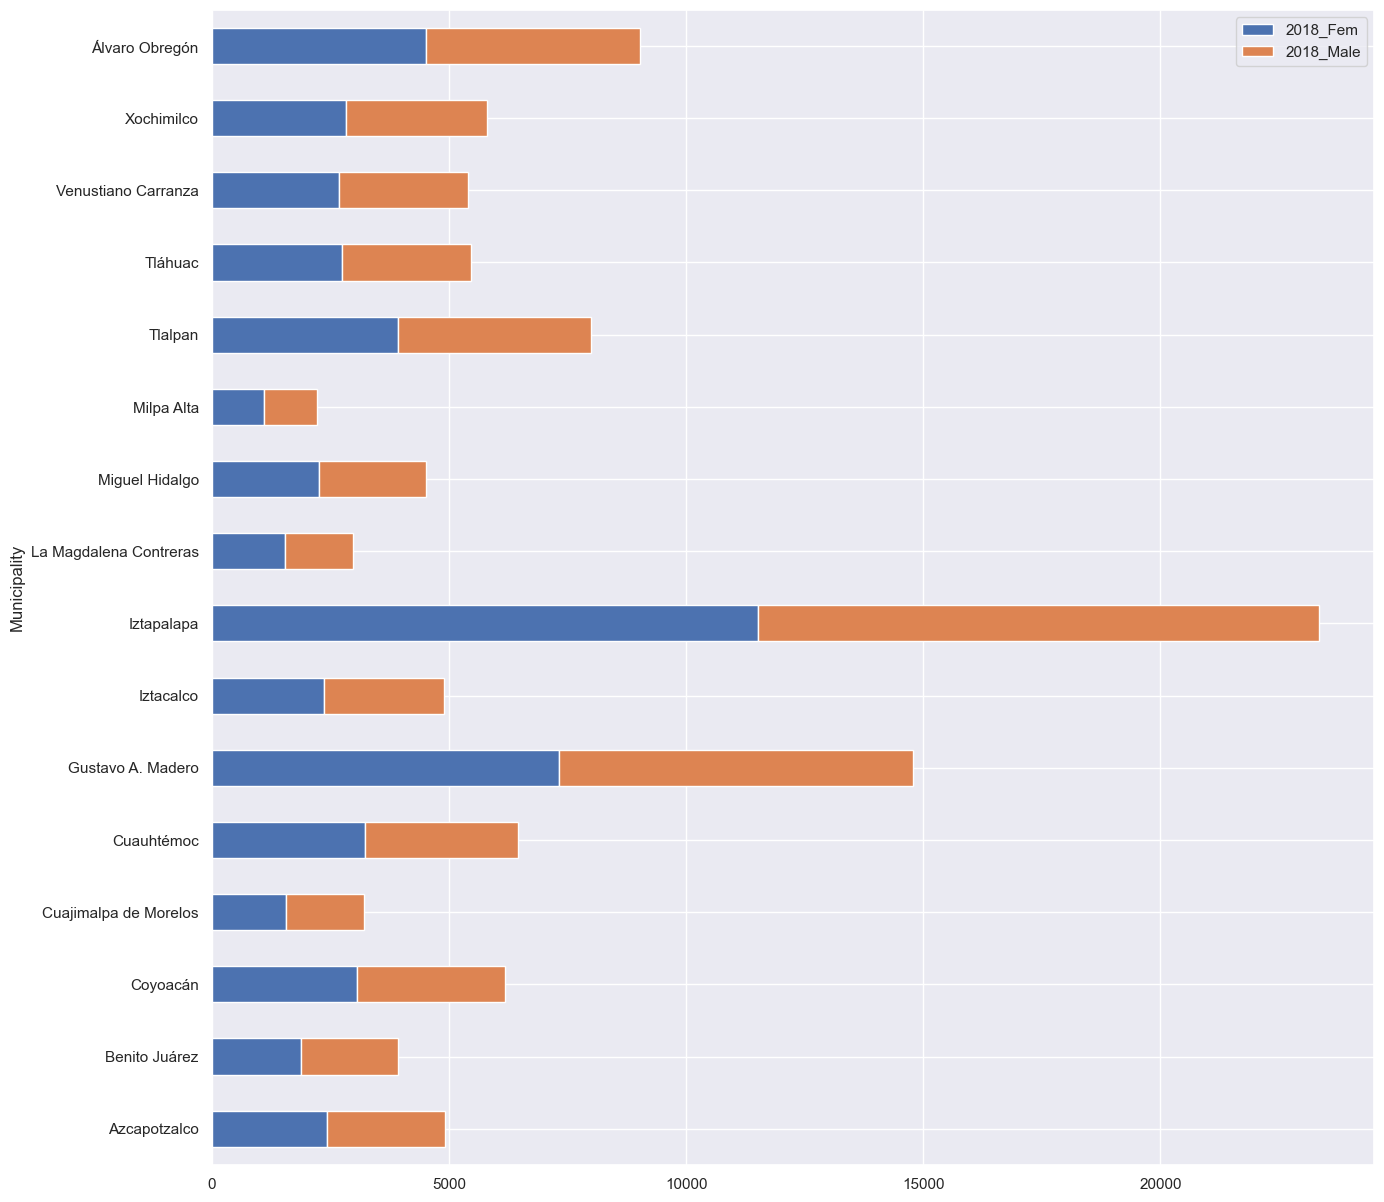

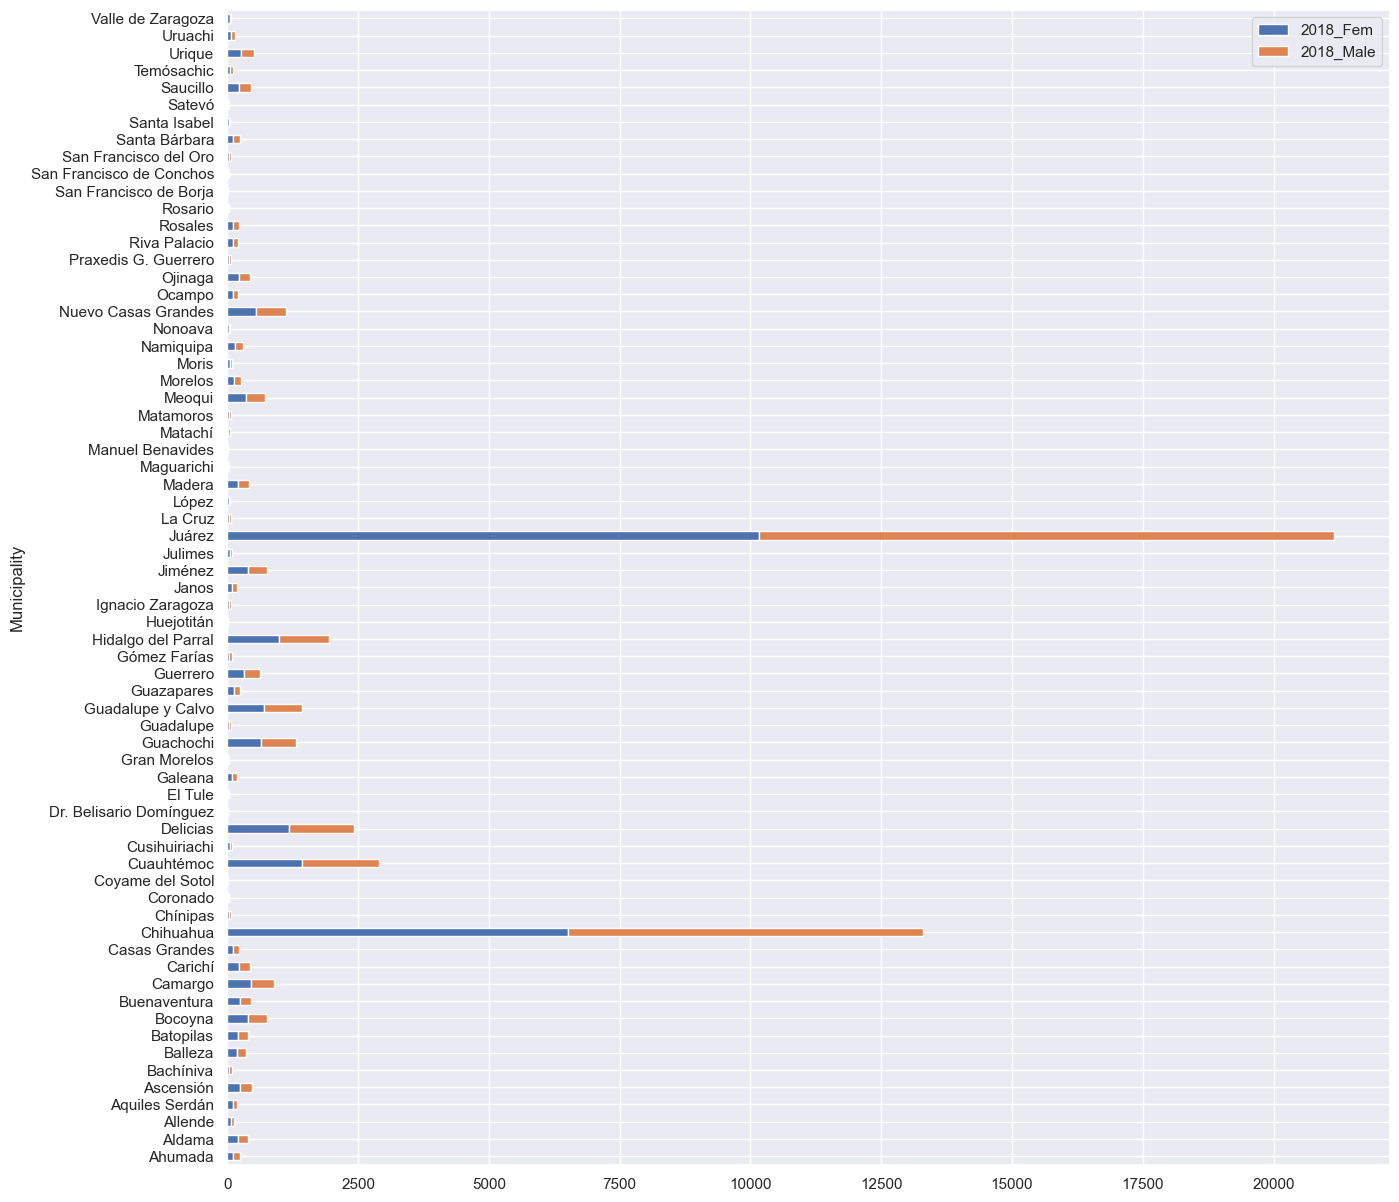

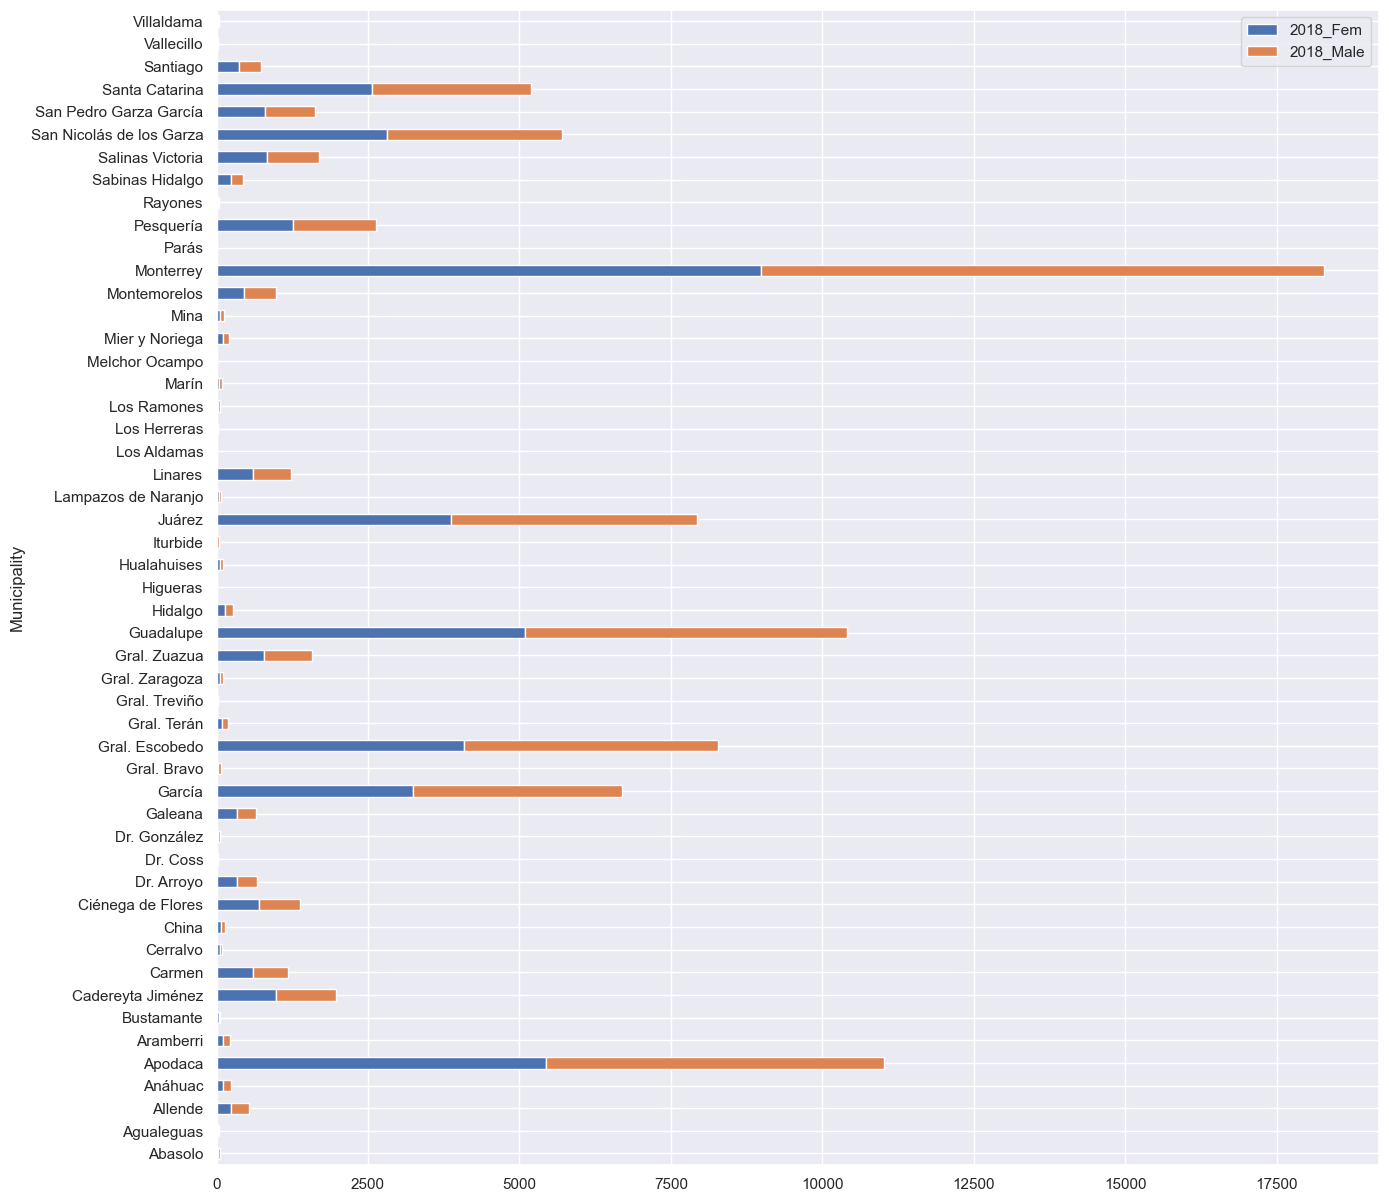

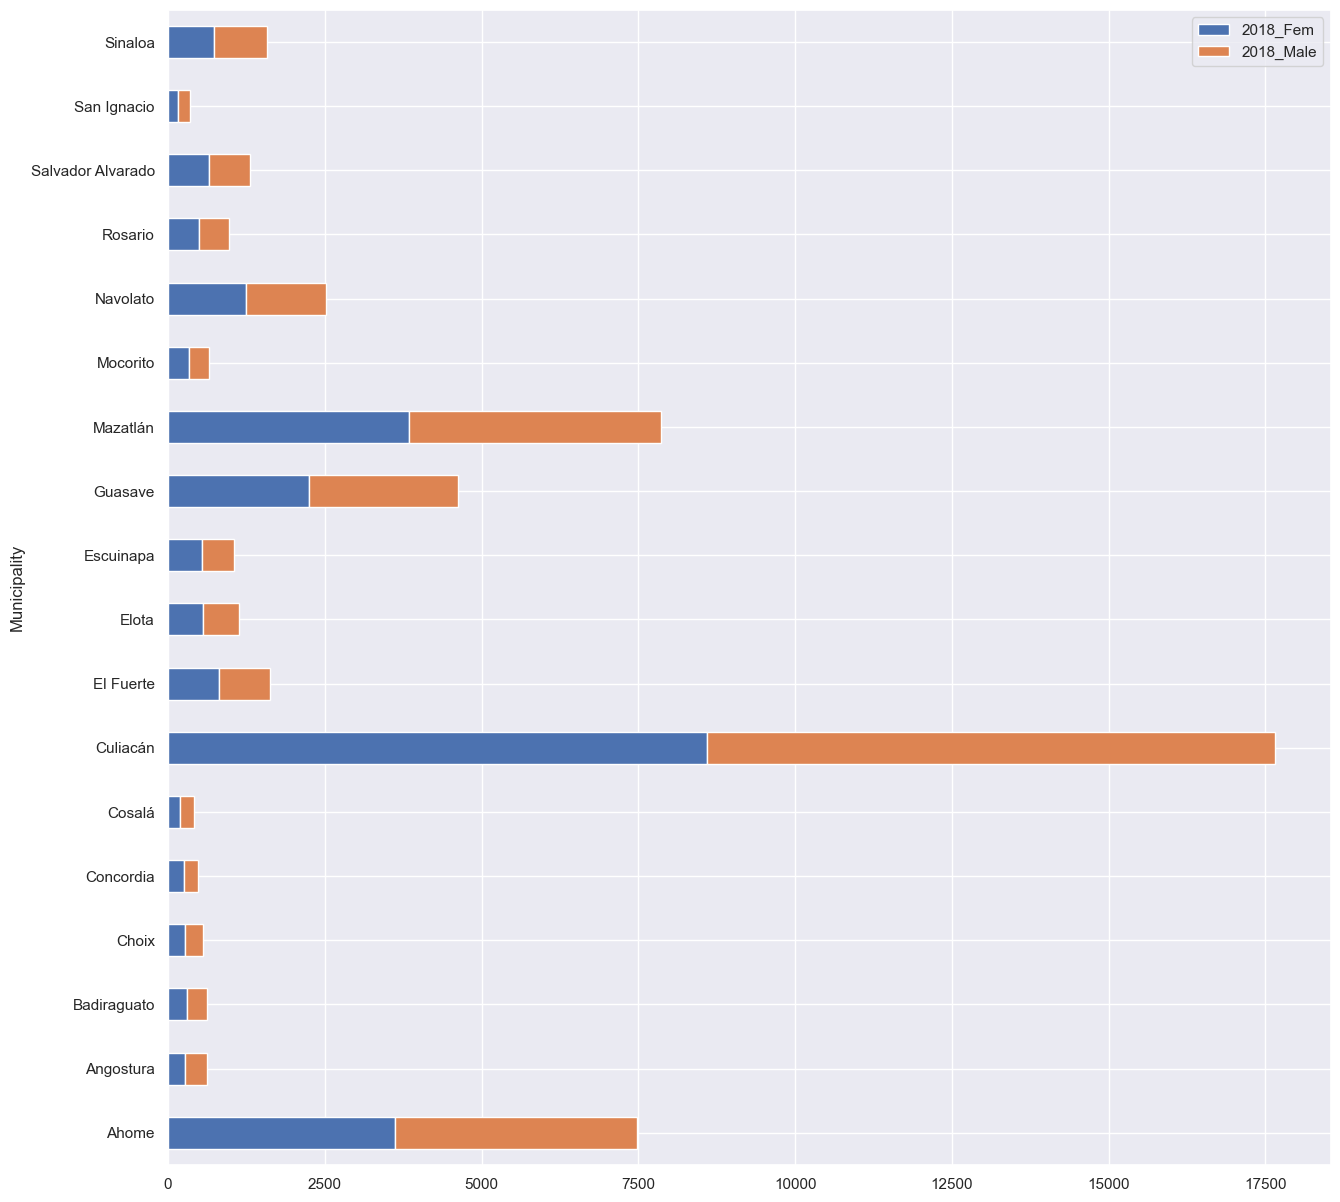

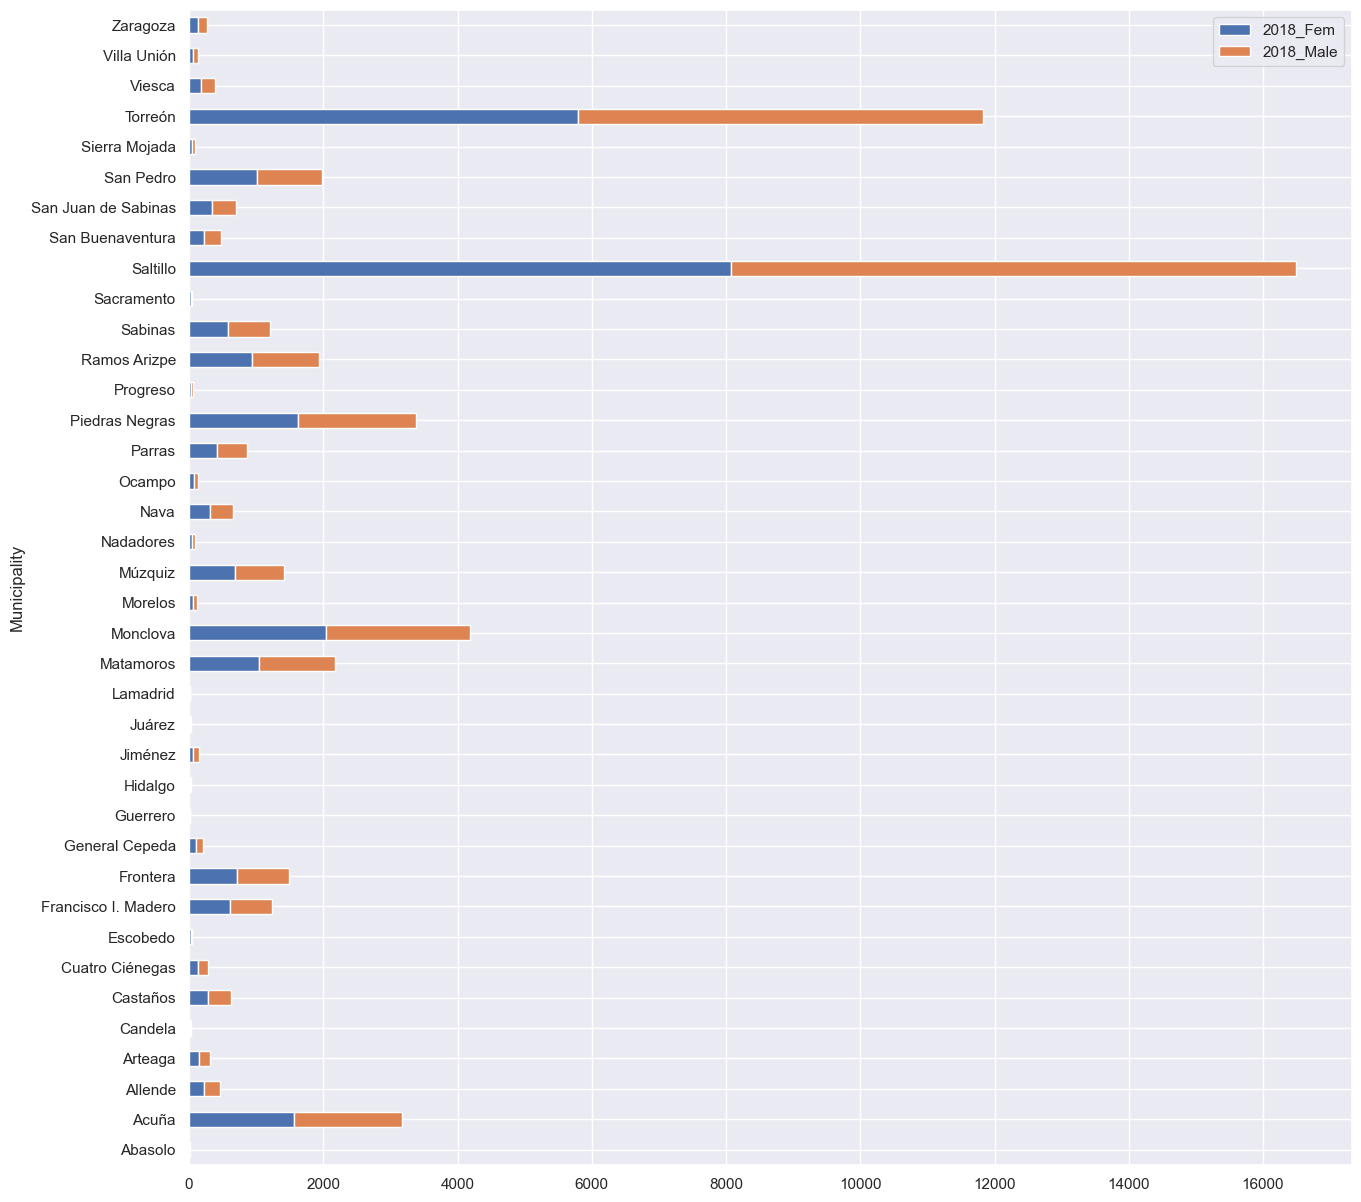

In [103]:
#Para cada estado graficare el total en 2018 de nacimientos respecto a cada municipio
for estado in lista_estados:
    df_temp = df_mx[df_mx['State'] == estado]
    data_2018 = df_temp.groupby('Municipality')[['2018_Fem','2018_Male']].mean()
    data_2018.plot.barh(stacked=True)

### Descripción de la población en el 2010 del estado con mayor número de habitantes.

In [104]:
columnas_2010 = ['State', 'Municipality','Total_Male_2010', '2010_Male_1529', '2010_Male_60', '2010_Male_md',
                'Total_Fem_2010', '2010_Fem_1529', '2010_Fem_60', '2010_Fem_md',]
df_2010 = df_mx[columnas_2010]
df_2010

State            Municipality  Total_Male_2010  \
0     Ciudad de México                 Tlalpan           312139   
1     Ciudad de México              Xochimilco           205305   
2     Ciudad de México  La Magdalena Contreras           114492   
3     Ciudad de México            Azcapotzalco           196053   
4     Ciudad de México           Benito Juárez           176410   
...                ...                     ...              ...   
2431      Quintana Roo                   Tulum            14714   
2432      Quintana Roo  Felipe Carrillo Puerto            37994   
2433      Quintana Roo                 Cozumel            40357   
2434      Quintana Roo         Lázaro Cárdenas            12972   
2435      Quintana Roo            Isla Mujeres             8358   

      2010_Male_1529  2010_Male_60  2010_Male_md  Total_Fem_2010  \
0                 26             9            28          338428   
1                 27             8            28          209702   
2                 26             9            28          124594   
3                 25            12            31          218658   
4                 23            14            35          209029   
...              ...           ...           ...             ...   
2431              32             3            23           13549   
2432              28             7            21           37032   
2433              28             5            26           39178   
2434              26             8            23           12361   
2435              27             5            26            7845   

      2010_Fem_1529  2010_Fem_60  2010_Fem_md  
0                25           11           31  
1                26           10           29  
2                24           11           31  
3                23           15           35  
4                20           19           38  
...             ...          ...          ...  
2431             32            3           22  
2432             28            6           21  
2433             28            5           26  
2434             28            7           23  
2435             29            5           25  

[2436 rows x 10 columns]

<Axes: xlabel='State', ylabel='Total_Fem_2010'>

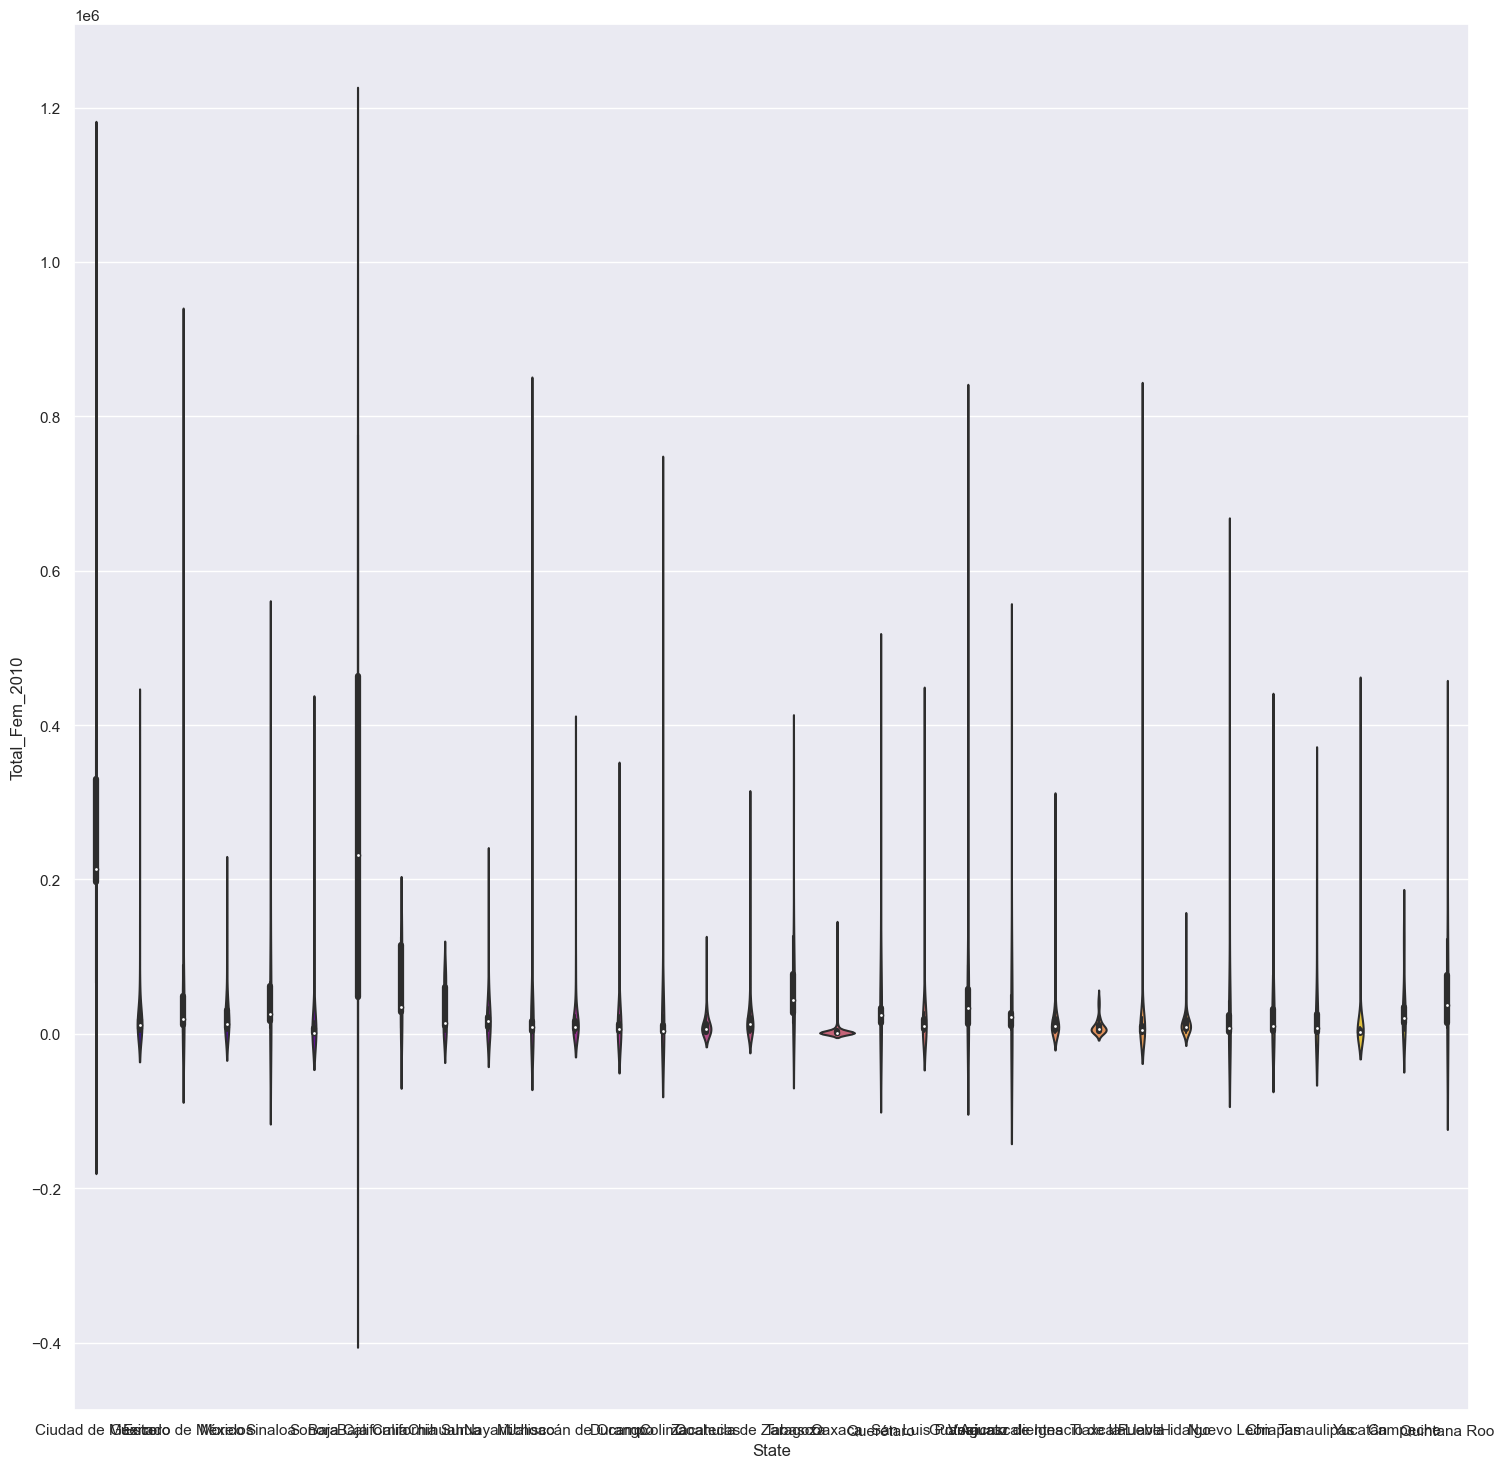

In [121]:
sns.violinplot(data=df_2010, x= 'State',y = 'Total_Fem_2010', palette='plasma')

<Axes: xlabel='State', ylabel='Total_Male_2010'>

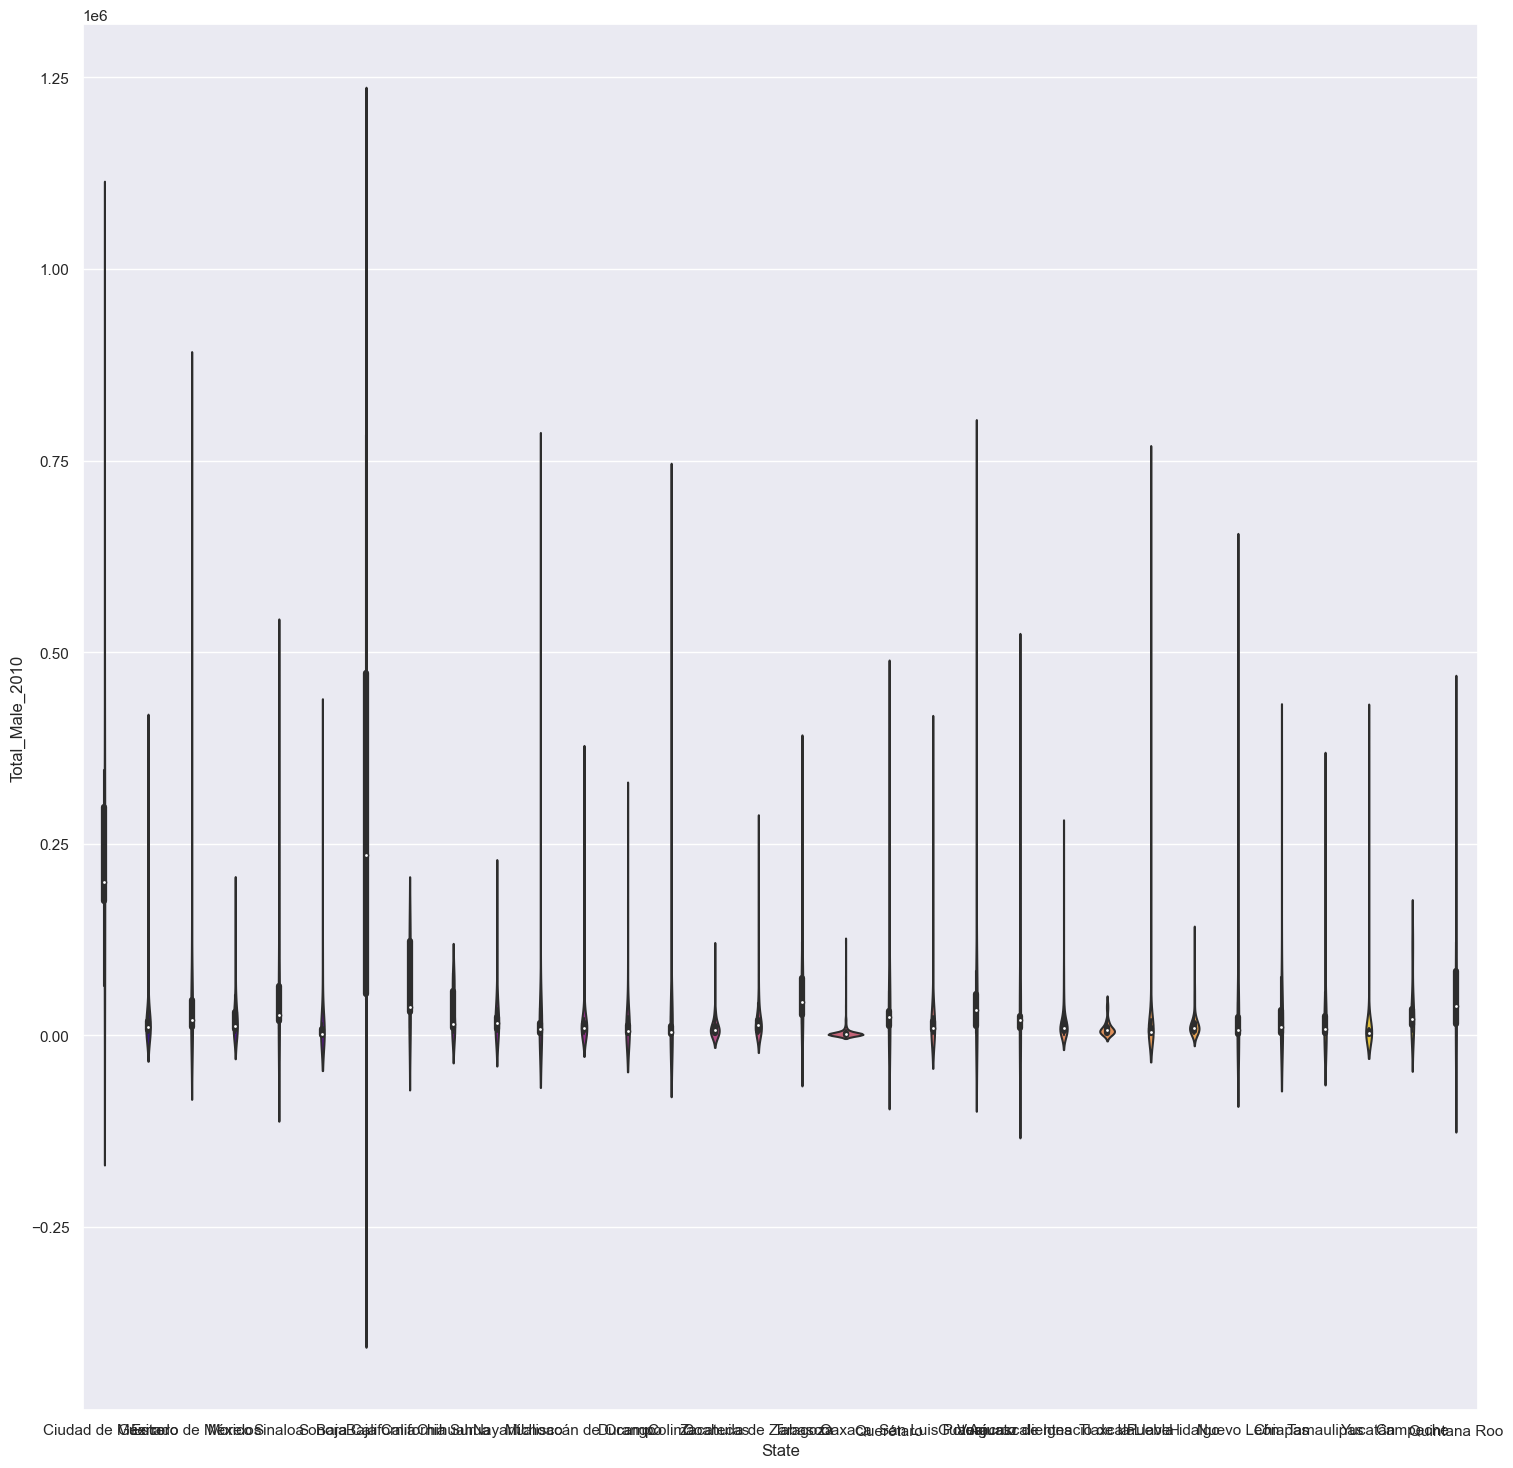

In [122]:
sns.violinplot(data=df_2010, x= 'State',y = 'Total_Male_2010', palette='plasma')

In [126]:
latCen_mx = +023.00
lonCen_mx = -100.00

indicaux = 'Total_Fem_2010' # chose the indicator to plot

# define a map
map_mx = folium.Map(location=[latCen_mx, lonCen_mx], width=970, height=600, zoom_start=5, min_zoom=5, max_zoom=10)

map_mx.choropleth(geo_data=geo_json_mx, data=df_mx,
    columns=['Code', indicaux],
    key_on='feature.properties.mun_code',
    fill_color='YlGnBu', fill_opacity=0.9, 
    line_opacity=0.2
)

map_mx

C:\Users\Ana Veronica\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [127]:
indicaux = 'Total_Male_2010' # chose the indicator to plot

# define a map
map_mx = folium.Map(location=[latCen_mx, lonCen_mx], width=970, height=600, zoom_start=5, min_zoom=5, max_zoom=10)

map_mx.choropleth(geo_data=geo_json_mx, data=df_mx,
    columns=['Code', indicaux],
    key_on='feature.properties.mun_code',
    fill_color='YlGnBu', fill_opacity=0.9, 
    line_opacity=0.2
)

map_mx

C:\Users\Ana Veronica\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [106]:
state_fem = df_2010.sort_values(by= 'Total_Fem_2010', ascending = False)['State'].max
state_male = df_2010.sort_values(by= 'Total_Fem_2010', ascending = False)['State'].max
#state_fem, state_male
#El estado con mayor número de personas es Ciudad de México para ambos casos

In [107]:
cdmx_2010 = df_2010[df_2010['State'] == 'Ciudad de México']
cdmx_2010

State            Municipality  Total_Male_2010  2010_Male_1529  \
0   Ciudad de México                 Tlalpan           312139              26   
1   Ciudad de México              Xochimilco           205305              27   
2   Ciudad de México  La Magdalena Contreras           114492              26   
3   Ciudad de México            Azcapotzalco           196053              25   
4   Ciudad de México           Benito Juárez           176410              23   
5   Ciudad de México              Cuauhtémoc           251725              26   
6   Ciudad de México          Álvaro Obregón           346041              26   
7   Ciudad de México       Gustavo A. Madero           571233              26   
8   Ciudad de México   Cuajimalpa de Morelos            88642              26   
9   Ciudad de México          Miguel Hidalgo           172667              24   
10  Ciudad de México               Iztacalco           182534              25   
11  Ciudad de México                Coyoacán           292491              25   
12  Ciudad de México     Venustiano Carranza           203651              25   
13  Ciudad de México                 Tláhuac           175210              27   
14  Ciudad de México              Iztapalapa           880998              27   
15  Ciudad de México              Milpa Alta            64192              27   

    2010_Male_60  2010_Male_md  Total_Fem_2010  2010_Fem_1529  2010_Fem_60  \
0              9            28          338428             25           11   
1              8            28          209702             26           10   
2              9            28          124594             24           11   
3             12            31          218658             23           15   
4             14            35          209029             20           19   
5             11            31          280106             23           15   
6              9            29          380993             25           12   
7             11            30          614539             24           14   
8              7            27           97749             27            8   
9             12            33          200222             23           16   
10            11            31          201792             23           14   
11            13            32          327925             23           15   
12            11            30          227327             23           15   
13             6            26          185055             26            8   
14             8            27          934788             26           10   
15             7            25           66390             27            7   

    2010_Fem_md  
0            31  
1            29  
2            31  
3            35  
4            38  
5            34  
6            32  
7            33  
8            28  
9            35  
10           34  
11           35  
12           34  
13           28  
14           29  
15           27

In [108]:
cdmx_2010.columns

Index(['State', 'Municipality', 'Total_Male_2010', '2010_Male_1529',
       '2010_Male_60', '2010_Male_md', 'Total_Fem_2010', '2010_Fem_1529',
       '2010_Fem_60', '2010_Fem_md'],
      dtype='object')

In [109]:
cdmx_df = cdmx_2010.copy()
columnas_male= ['Municipality', 'Total_Male_2010', '2010_Male_1529', '2010_Male_60', '2010_Male_md']
cdmx_male = cdmx_df[columnas_male]
cdmx_male['Genre'] = 'Male'
diccionario_male = {'Total_Male_2010': 'Total_2010', '2010_Male_1529': '2010_1529', 
                    '2010_Male_60': '2010_60', '2010_Male_md': '2010_md' }
cdmx_male.rename(columns=diccionario_male, inplace=True)
cdmx_male

C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\1191345727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdmx_male['Genre'] = 'Male'
C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\1191345727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdmx_male.rename(columns=diccionario_male, inplace=True)


Municipality  Total_2010  2010_1529  2010_60  2010_md Genre
0                  Tlalpan      312139         26        9       28  Male
1               Xochimilco      205305         27        8       28  Male
2   La Magdalena Contreras      114492         26        9       28  Male
3             Azcapotzalco      196053         25       12       31  Male
4            Benito Juárez      176410         23       14       35  Male
5               Cuauhtémoc      251725         26       11       31  Male
6           Álvaro Obregón      346041         26        9       29  Male
7        Gustavo A. Madero      571233         26       11       30  Male
8    Cuajimalpa de Morelos       88642         26        7       27  Male
9           Miguel Hidalgo      172667         24       12       33  Male
10               Iztacalco      182534         25       11       31  Male
11                Coyoacán      292491         25       13       32  Male
12     Venustiano Carranza      203651         25       11       30  Male
13                 Tláhuac      175210         27        6       26  Male
14              Iztapalapa      880998         27        8       27  Male
15              Milpa Alta       64192         27        7       25  Male

In [110]:
cdmx_df = cdmx_2010.copy()
columnas_fem= ['Municipality', 'Total_Fem_2010', '2010_Fem_1529', '2010_Fem_60', '2010_Fem_md']
cdmx_fem = cdmx_df[columnas_fem]
diccionario_fem = {'Total_Fem_2010': 'Total_2010', '2010_Fem_1529': '2010_1529', 
                    '2010_Fem_60': '2010_60', '2010_Fem_md': '2010_md' }
cdmx_fem.rename(columns=diccionario_fem, inplace=True)
cdmx_fem['Genre'] = 'Female'
cdmx_fem

C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\432835763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdmx_fem.rename(columns=diccionario_fem, inplace=True)
C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\432835763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdmx_fem['Genre'] = 'Female'


Municipality  Total_2010  2010_1529  2010_60  2010_md   Genre
0                  Tlalpan      338428         25       11       31  Female
1               Xochimilco      209702         26       10       29  Female
2   La Magdalena Contreras      124594         24       11       31  Female
3             Azcapotzalco      218658         23       15       35  Female
4            Benito Juárez      209029         20       19       38  Female
5               Cuauhtémoc      280106         23       15       34  Female
6           Álvaro Obregón      380993         25       12       32  Female
7        Gustavo A. Madero      614539         24       14       33  Female
8    Cuajimalpa de Morelos       97749         27        8       28  Female
9           Miguel Hidalgo      200222         23       16       35  Female
10               Iztacalco      201792         23       14       34  Female
11                Coyoacán      327925         23       15       35  Female
12     Venustiano Carranza      227327         23       15       34  Female
13                 Tláhuac      185055         26        8       28  Female
14              Iztapalapa      934788         26       10       29  Female
15              Milpa Alta       66390         27        7       27  Female

In [111]:
cdmx_df = pd.concat([cdmx_male, cdmx_fem],  ignore_index = True)
cdmx_df

Municipality  Total_2010  2010_1529  2010_60  2010_md   Genre
0                  Tlalpan      312139         26        9       28    Male
1               Xochimilco      205305         27        8       28    Male
2   La Magdalena Contreras      114492         26        9       28    Male
3             Azcapotzalco      196053         25       12       31    Male
4            Benito Juárez      176410         23       14       35    Male
5               Cuauhtémoc      251725         26       11       31    Male
6           Álvaro Obregón      346041         26        9       29    Male
7        Gustavo A. Madero      571233         26       11       30    Male
8    Cuajimalpa de Morelos       88642         26        7       27    Male
9           Miguel Hidalgo      172667         24       12       33    Male
10               Iztacalco      182534         25       11       31    Male
11                Coyoacán      292491         25       13       32    Male
12     Venustiano Carranza      203651         25       11       30    Male
13                 Tláhuac      175210         27        6       26    Male
14              Iztapalapa      880998         27        8       27    Male
15              Milpa Alta       64192         27        7       25    Male
16                 Tlalpan      338428         25       11       31  Female
17              Xochimilco      209702         26       10       29  Female
18  La Magdalena Contreras      124594         24       11       31  Female
19            Azcapotzalco      218658         23       15       35  Female
20           Benito Juárez      209029         20       19       38  Female
21              Cuauhtémoc      280106         23       15       34  Female
22          Álvaro Obregón      380993         25       12       32  Female
23       Gustavo A. Madero      614539         24       14       33  Female
24   Cuajimalpa de Morelos       97749         27        8       28  Female
25          Miguel Hidalgo      200222         23       16       35  Female
26               Iztacalco      201792         23       14       34  Female
27                Coyoacán      327925         23       15       35  Female
28     Venustiano Carranza      227327         23       15       34  Female
29                 Tláhuac      185055         26        8       28  Female
30              Iztapalapa      934788         26       10       29  Female
31              Milpa Alta       66390         27        7       27  Female

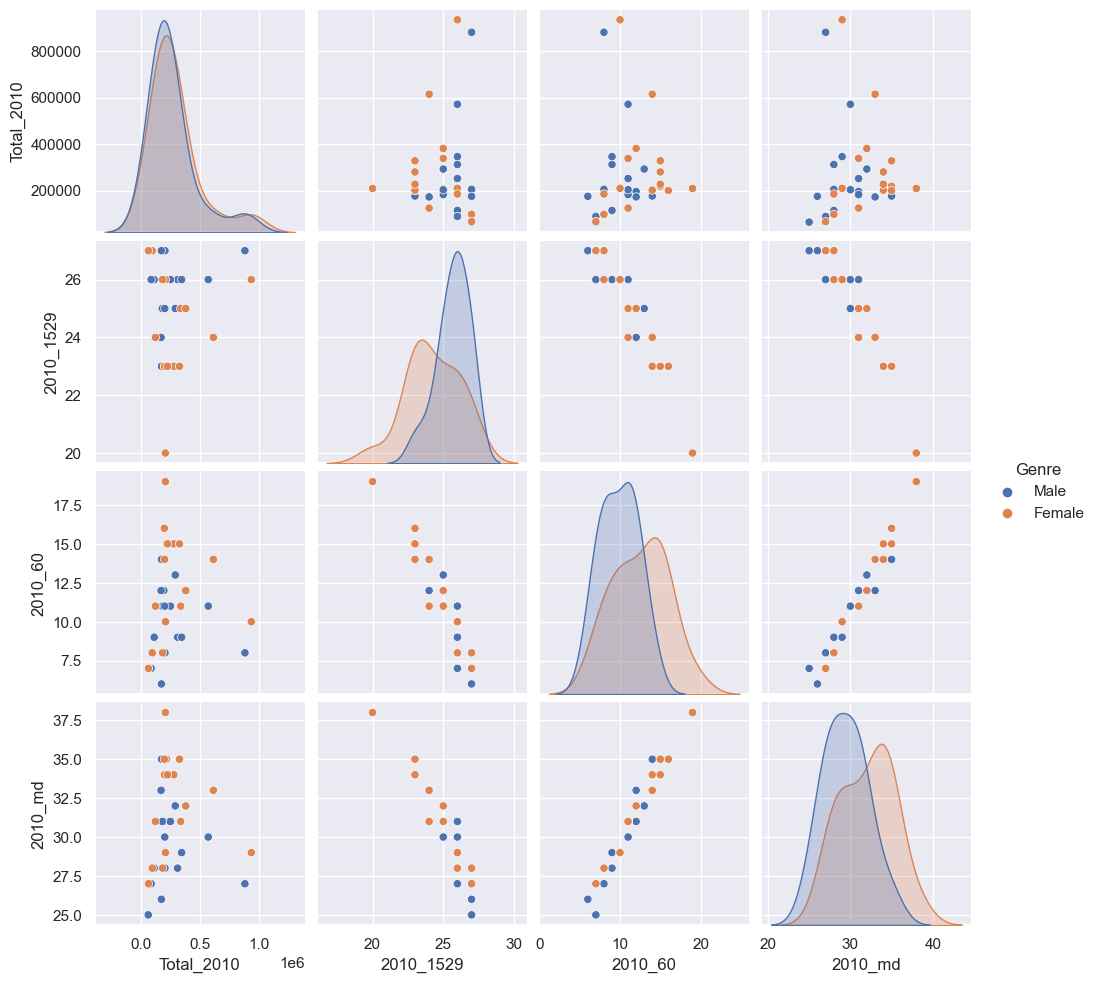

In [112]:
sns.pairplot(cdmx_df, hue = 'Genre')

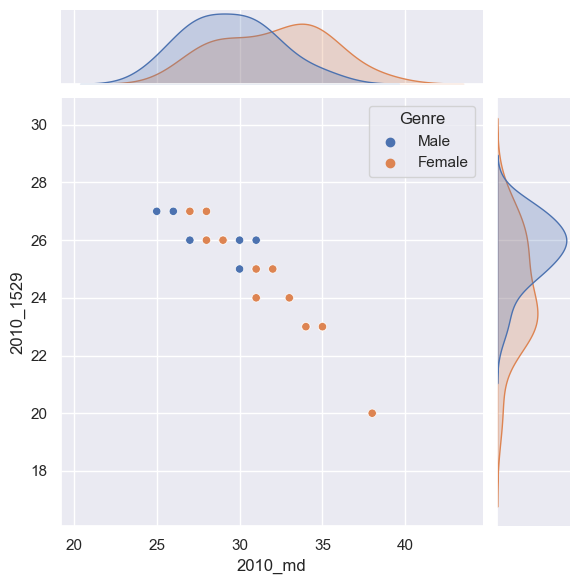

In [113]:
sns.jointplot(data = cdmx_df, x = "2010_md", y = "2010_1529", hue="Genre")

In [123]:
cdmx_df.corr()

C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\1306335712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cdmx_df.corr()


Total_2010  2010_1529   2010_60   2010_md
Total_2010    1.000000   0.096683  0.049135 -0.007883
2010_1529     0.096683   1.000000 -0.945955 -0.949767
2010_60       0.049135  -0.945955  1.000000  0.977859
2010_md      -0.007883  -0.949767  0.977859  1.000000

C:\Users\Ana Veronica\AppData\Local\Temp\ipykernel_5344\746657035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cdmx_df.corr(), cmap='Blues')


<Axes: >

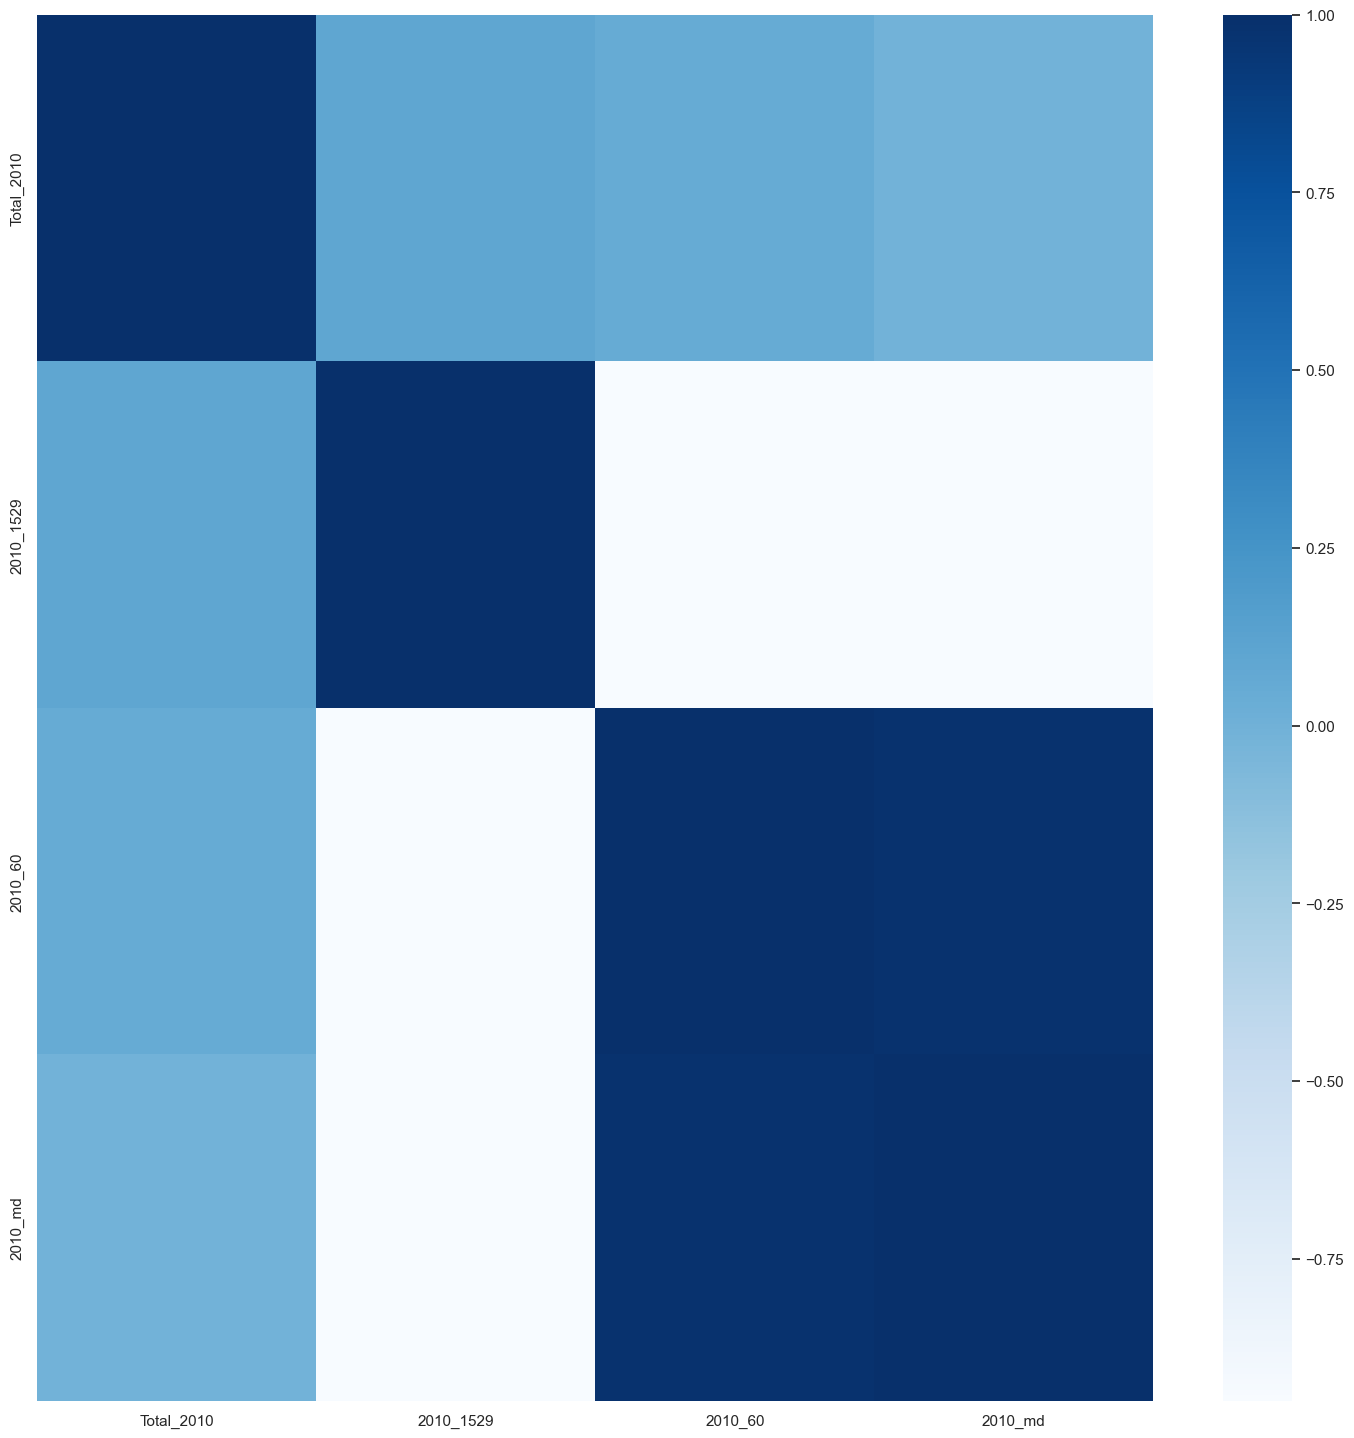

In [124]:
sns.heatmap(cdmx_df.corr(), cmap='Blues')